<a href="https://colab.research.google.com/github/maronga/Group-4-Core-A-Study-on-Tourism-Activites-in-Tanzania/blob/main/TEAM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the Question** 
     
In Tanzania, the tourism sector is second in ranking in contributing to the national income. However, during the times of COVID, the industry took a huge blow due to travel restrictions. Now as countries are opening up, Tanzania should expect tourists to come back. The aim of this study is to give insight on the main tourism activity in Tanzania to invest more resources in.


**Defining the Metric of Success**

Successfully performing Exploratory Data Analysis, Univariate, Bivariate Analysis,Create Visualizations Testing a Hypothesis and Challenging the solution.

**Understanding the Context**


Tanzania’s tourism sector generated USD 1 billion in revenues in 2020 versus 2.6 billion in 2019, being severely affected by the Covid-19 pandemic and its impact on international travel. The sector’s contribution to GDP fell from 107% in 2019 to 5.3% in 2020. International tourist arrivals reached 620,900 in 2020, less than half the 1.5 million arrivals in 2019, the 1.4 million in 2018, and the 1.3 million in 2017.

**Recording the Experimental Design**


Below are the steps we took to implement this solution


1.   Business Understanding:This sheds light to the context of the research question we are trying to answer ensures we keep the focus during the data analysis so that we meet the intended objectives
2.   Reading the data: Read the data with the aim to understand the content in our dataset
3. Checking our data: We perfomed this step so that we could get details about our dataset like number of rows and columns and null values
4. Data cleaning: We performed the data cleaning and preparation to make our data ready for analysis
5. Challenged the solution

**Data Relevance**


The source of our data is [Zindi](https://zindi.africa/competitions/tanzania-tourism-prediction/data)

The surveys were
conducted recently, hence the data is current and has individual demograpgics that will
support us in assessing factors that drive financial inclusion.

#1. Importing our libraries

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**1.1 Reading the Dataset from our CSV file**

In [ ]:
# Load our dataset and view the first five columns
tourism = pd.read_csv('/content/Tourism.csv')
tourism.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,Jan-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0


In [ ]:
# Let's view the last five columns
tourism.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2,0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11,0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,Jan-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3,7,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5,0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,4,7,Cash,Yes,Friendly People,13260000.0


In [ ]:
# Check the number of rows and columns in our dataframe
tourism.shape

(4809, 23)

There are 4,809 rows and 23 columns

In [ ]:
# Our dataframe information
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [ ]:
# Identify any missing values
tourism.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [ ]:
# The total number of missing values in our dataframe
tourism.isnull().sum().sum()

1435

There are 1,435 null values 

In [ ]:
# Check for duplicate values
tourism.duplicated().sum()

0

There are no duplicate values

In [ ]:
# Check the statistical information of our dataframe
tourism.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [ ]:
# Let's identify the column names in our dataset
tourism.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')


#1.2. Data Cleaning

In [ ]:
# Handling Missing Values
tourism.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [ ]:
# We will fill missing values in the travel_with column with DNS this stands for did not submit
tourism['travel_with'].fillna('DNS', inplace = True)
# View the changes
tourism.head(10)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,DNS,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,Jan-24,DNS,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0
5,tour_1005,UNITED KINGDOM,25-44,DNS,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,No,No,No,Yes,Yes,No,9,3,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,9,0,Cash,Yes,Friendly People,466140.0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Friendly People,3480750.0
8,tour_101,NIGERIA,25-44,Alone,0.0,1.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,NaN,994500.0
9,tour_1011,INDIA,25-44,Alone,1.0,0.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,5,0,Credit Card,Yes,Friendly People,2486250.0


In [ ]:
# We will fill missing values in total female and total male with 0
tourism['total_female'].fillna(0.0, inplace = True)
tourism['total_male'].fillna(0.0, inplace = True)

In [ ]:
# Drop columns that we will not use in our analysis
tourism.drop(['most_impressing','info_source'],axis=1, inplace=True)
# Confirm changes
tourism.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,13,0,Cash,No,674602.5
1,tour_10,UNITED KINGDOM,25-44,DNS,1.0,0.0,Leisure and Holidays,Cultural tourism,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,Independent,No,No,No,No,No,No,No,1,31,Cash,No,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,7790250.0
4,tour_1004,CHINA,Jan-24,DNS,1.0,0.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,1657500.0


In [ ]:
# Final check for null values
tourism.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
total_cost               0
dtype: int64

We have cleared our data of null values

We chose to replace the missing values in travel with with DNS, we assumed that respondents chose not to give an answer.

We chose to replace the null values in total male and total female with 0 because we assumed that they were not filled because they were not there.

In [ ]:
# Duplicates
tourism.duplicated().sum()

0

We have no duplicate values

In [ ]:
tourism.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'total_cost'],
      dtype='object')

In [ ]:
# Check for any anomalies
col = ['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'total_cost']
for i in col:
  u = tourism[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  ID is ['tour_0' 'tour_10' 'tour_1000' ... 'tour_995' 'tour_997' 'tour_999']
Unique values of  country is ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO

In [ ]:
# A anomaly noticed is Jan-24 in age group
# We will replace it with 1-24 age group 
tourism['age_group'] = tourism['age_group'].replace(['Jan-24'],'1-24')

In [ ]:
# Confirm changes made
tourism.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,13,0,Cash,No,674602.5
1,tour_10,UNITED KINGDOM,25-44,DNS,1.0,0.0,Leisure and Holidays,Cultural tourism,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,Independent,No,No,No,No,No,No,No,1,31,Cash,No,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,7790250.0
4,tour_1004,CHINA,1-24,DNS,1.0,0.0,Leisure and Holidays,Wildlife tourism,Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,1657500.0


In [ ]:
tourism.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
payment_mode              object
first_trip_tz             object
total_cost               float64
dtype: object

In [ ]:
tourism.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'total_cost'],
      dtype='object')

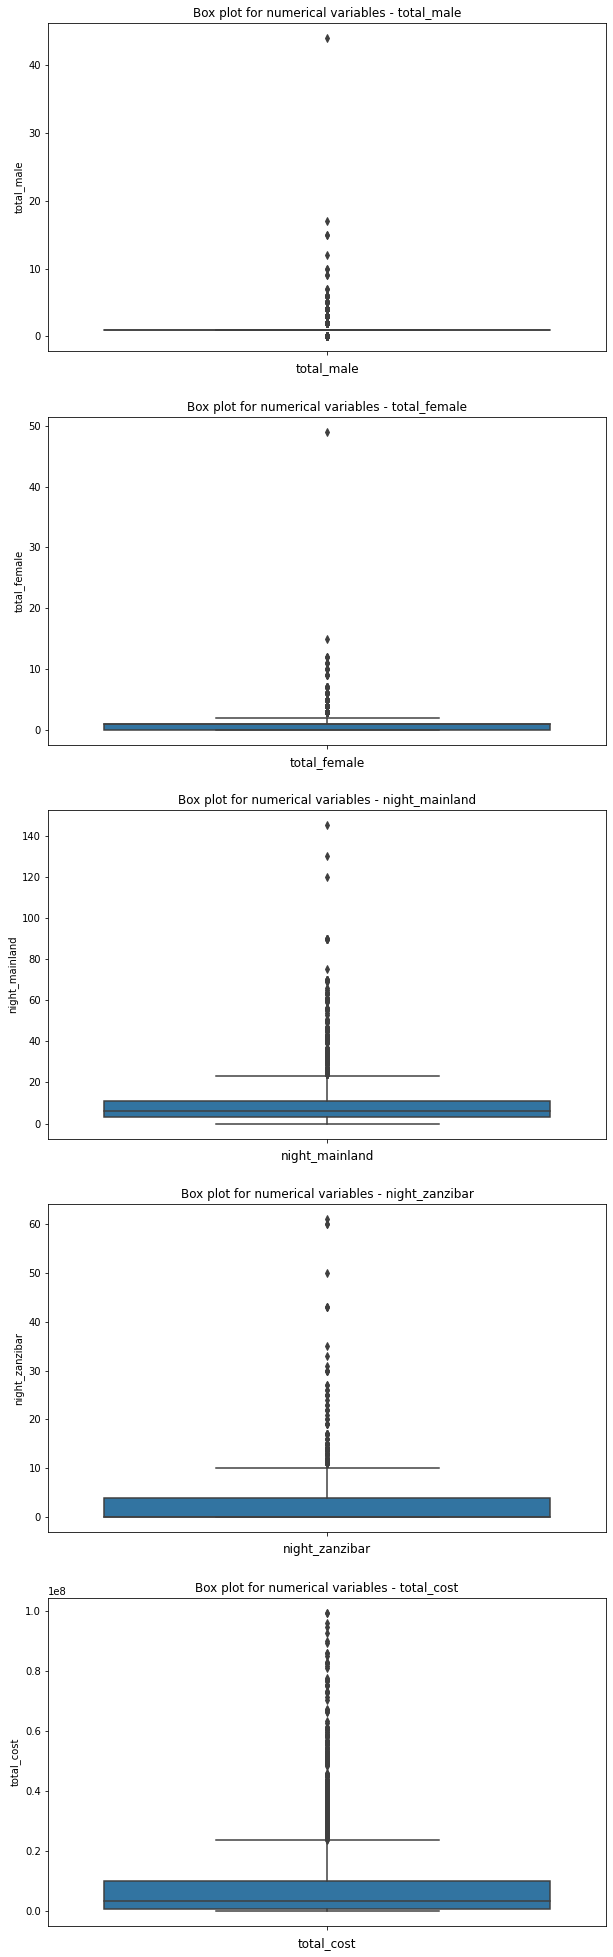

In [ ]:
# Outliers
col_names= ['total_male','total_female', 'night_mainland', 'night_zanzibar','total_cost']

fig, ax = plt.subplots(len(col_names), figsize=(10,35))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=tourism[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [ ]:
# Dealing with outliers
# We will remove outliers
Q1 = tourism.quantile(0.25)
Q3 = tourism.quantile(0.75)
IQR = Q3-Q1
tourism_out = tourism[~((tourism<(Q1 - 1.5*IQR)) |(tourism> (Q3 + 1.5 * IQR))).any(axis= 1)]
print(tourism_out)

             ID                   country  ... first_trip_tz  total_cost
0        tour_0                SWIZERLAND  ...            No    674602.5
3     tour_1002            UNITED KINGDOM  ...           Yes   7790250.0
5     tour_1005            UNITED KINGDOM  ...           Yes    120950.0
6     tour_1007              SOUTH AFRICA  ...           Yes    466140.0
7     tour_1008  UNITED STATES OF AMERICA  ...           Yes   3480750.0
...         ...                       ...  ...           ...         ...
4801   tour_989                     ITALY  ...           Yes   2269330.0
4804   tour_993                       UAE  ...            No   3315000.0
4805   tour_994  UNITED STATES OF AMERICA  ...           Yes  10690875.0
4807   tour_997              SOUTH AFRICA  ...            No   1160250.0
4808   tour_999            UNITED KINGDOM  ...           Yes  13260000.0

[2448 rows x 21 columns]


Outliers increase the variability in your data, which decreases statistical power.Excluding outliers can cause your results to become statistically significant

#1.3. Exploratory Data Analysis


##Univariate Analysis

In [ ]:
# Frequency Table
tourism_out.age_group.value_counts()

25-44    1399
45-64     682
1-24      225
65+       142
Name: age_group, dtype: int64

Most tourists are between 25 and 44 years

In [ ]:
# Frequency Table
tourism_out['country'].value_counts().head()


UNITED STATES OF AMERICA    302
UNITED KINGDOM              249
ITALY                       226
ZIMBABWE                    201
KENYA                       138
Name: country, dtype: int64

Most tourists are from the United States of America

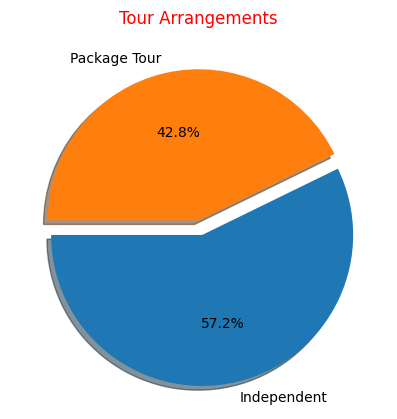

In [ ]:
# Pie chart
accounts = tourism_out['tour_arrangement'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0.1,0), shadow=True, startangle=180)
plt.title('Tour Arrangements', color='Red')
plt.show()

Less tourists use package tours

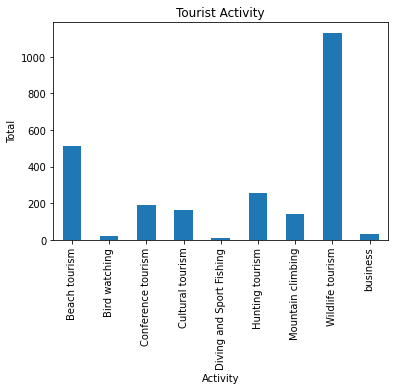

In [ ]:
# Bar charts 
tourism_out.groupby('main_activity').size().plot(kind='bar')
plt.title('Tourist Activity')
plt.ylabel('Total')
plt.xlabel('Activity')
plt.show()

Wildlife tourism is the most popular tourist activity

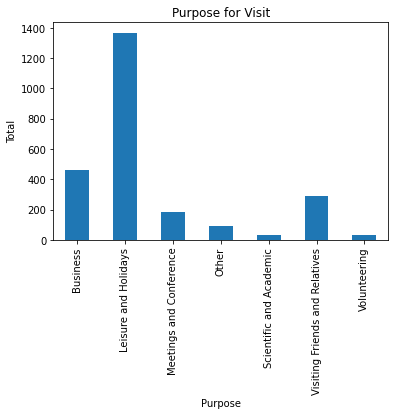

In [ ]:
# Bar charts 
tourism_out.groupby('purpose').size().plot(kind='bar')
plt.title('Purpose for Visit')
plt.ylabel('Total')
plt.xlabel('Purpose')
plt.show()

Most tourists visit for leisure and holidays

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

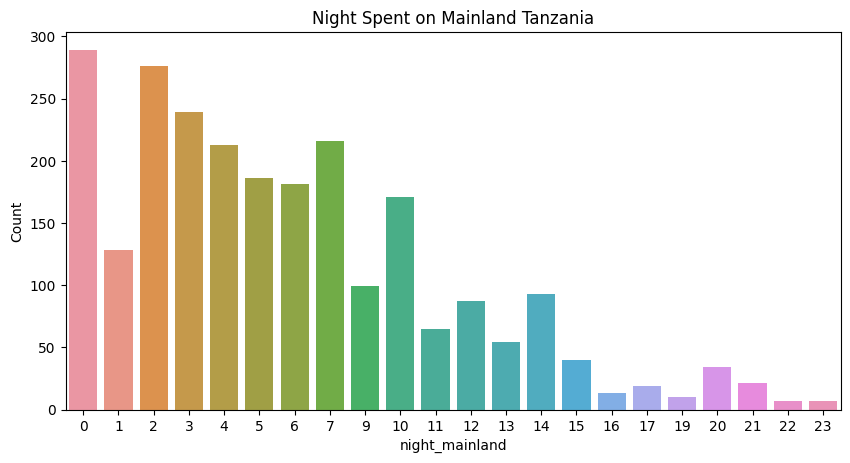

In [ ]:
plt.figure(figsize = (10, 5), dpi=100)
sns.countplot(tourism_out['night_mainland'])
plt.title('Night Spent on Mainland Tanzania')
plt.ylabel('Count')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

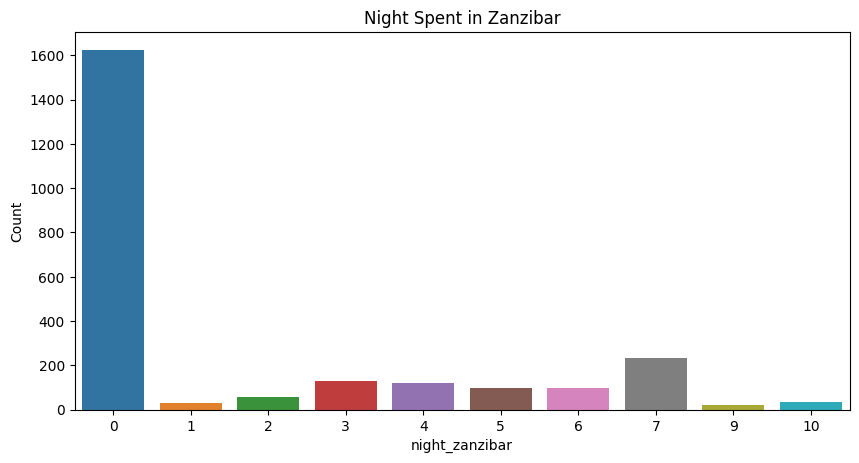

In [ ]:
plt.figure(figsize = (10,5), dpi=100)
sns.countplot(tourism_out['night_zanzibar'])
plt.title('Night Spent in Zanzibar')
plt.ylabel('Count')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


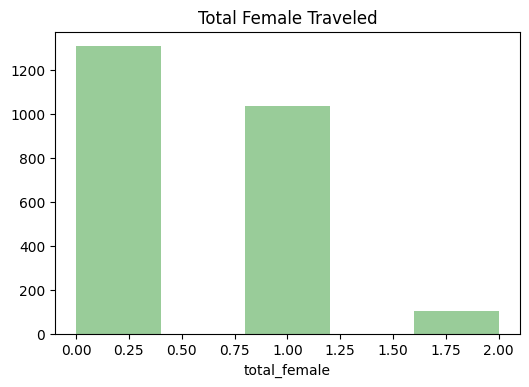

In [ ]:
# Histogram of total female
plt.figure(dpi = 100)
sns.distplot(tourism_out["total_female"], kde = False, color = 'green', bins=5)
plt.title("Total Female Traveled", color = 'black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


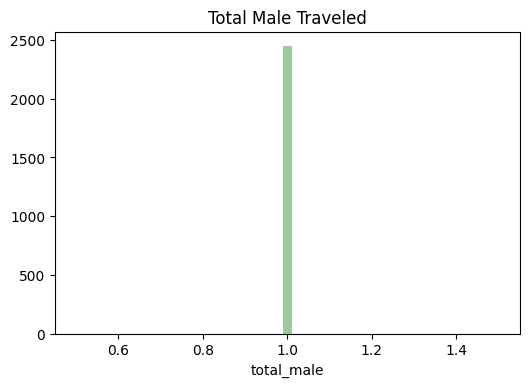

In [ ]:
# Histogram of total male 
plt.figure(dpi = 100)
sns.distplot(tourism_out["total_male"], kde = False, color = 'green')
plt.title("Total Male Traveled", color = 'Black')
plt.show()

In [ ]:
# We will define the numerical columns as cols to make the work easier
cols = ['total_male','total_female', 'night_mainland', 'night_zanzibar', 'total_cost']
# Finding the mean of numerical columns
round(tourism_out[cols].mean(),3)

total_male              1.000
total_female            0.507
night_mainland          6.086
night_zanzibar          1.751
total_cost        4876564.888
dtype: float64

In [ ]:
# Finding the mode of numerical columns
tourism_out[cols].mode()

,total_male,total_female,night_mainland,night_zanzibar,total_cost
0,1.0,0.0,0,0,1657500.0


In [ ]:
# Finding the median of numerical columns
tourism_out[cols].median()

total_male              1.0
total_female            0.0
night_mainland          5.0
night_zanzibar          0.0
total_cost        2486250.0
dtype: float64

In [ ]:
# Finding the quantiles of numerical columns
tourism_out[cols].quantile([0.25, 0.75])

,total_male,total_female,night_mainland,night_zanzibar,total_cost
0.25,1.0,0.0,2.0,0.0,580125.0
0.75,1.0,1.0,10.0,3.0,7458750.0


In [ ]:
# Standard Deviation of numerical colums
round(tourism_out[cols].std(),3)

total_male              0.000
total_female            0.577
night_mainland          5.039
night_zanzibar          2.759
total_cost        5561955.654
dtype: float64

In [ ]:
# Variance of numerical colums
tourism_out[cols].var()

In [ ]:
# Skewness of numerical columns
tourism_out[cols].skew()

total_male        0.000000
total_female      0.622976
night_mainland    0.969215
night_zanzibar    1.281334
total_cost        1.380576
dtype: float64

Our data is positively skewed 

In [ ]:
# The Kurtosis of numerical columns
tourism_out[cols].kurt()

total_male        0.000000
total_female     -0.591377
night_mainland    0.509009
night_zanzibar    0.267620
total_cost        1.114069
dtype: float64

### Bivariate Analysis